<a href="https://colab.research.google.com/github/deenadayalanai/PyTorch/blob/main/Regression_in_pytorch_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import matplotlib.pyplot as plt

In [2]:
x = torch.tensor([0, 1, 2, 3, 4, 5, 6, 7.]) # E.g.: Dosage of drug for treating Alzheimer's disease
x

tensor([0., 1., 2., 3., 4., 5., 6., 7.])

The $y$ values were created using the equation of a line $y = mx + b$. This way, we know what the model parameters to be learned are, say, $m = -0.5$ and $b = 2$. Random, normally-distributed noise has been added to simulate sampling error:

In [3]:
 #y = -0.5*x + 2 + torch.normal(mean=torch.zeros(8), std=0.2)

In [4]:
y = torch.tensor([1.86, 1.31, .62, .33, .09, -.67, -1.23, -1.37]) # E.g.: Patient's "forgetfulness score"
y

tensor([ 1.8600,  1.3100,  0.6200,  0.3300,  0.0900, -0.6700, -1.2300, -1.3700])

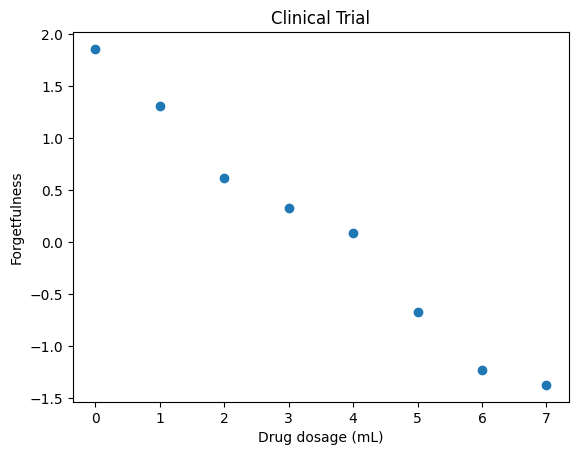

In [5]:
fig, ax = plt.subplots()
plt.title("Clinical Trial")
plt.xlabel("Drug dosage (mL)")
plt.ylabel("Forgetfulness")
_ = ax.scatter(x, y)

Initialize the slope parameter $m$ with a "random" value of 0.9...

(**N.B.**: In this simple demo, we could guess approximately-correct parameter values to start with. Or, we could use an algebraic (e.g., Moore-Penrose pseudoinverse) or statistical (e.g., ordinary-least-squares regression) to solve for the parameters quickly. This tiny machine learning demo with two parameters and eight data points scales, however, to millions of parameters and millions of data points. The other approaches -- guessing, algebra, statistics -- do not come close to scaling in this way.)

In [6]:
m = torch.tensor([0.9]).requires_grad_()
m

tensor([0.9000], requires_grad=True)

...and do the same for the $y$-intercept parameter $b$:

In [7]:
b = torch.tensor([0.1]).requires_grad_()
b

tensor([0.1000], requires_grad=True)

In [8]:
def regression(my_x, my_m, my_b):
    return my_m*my_x + my_b

In [9]:
def regression_plot(my_x, my_y, my_m, my_b):

    fig, ax = plt.subplots()

    ax.scatter(my_x, my_y)

    x_min, x_max = ax.get_xlim()
    y_min = regression(x_min, my_m, my_b).detach().item()
    y_max = regression(x_max, my_m, my_b).detach().item()

    ax.set_xlim([x_min, x_max])
    _ = ax.plot([x_min, x_max], [y_min, y_max])

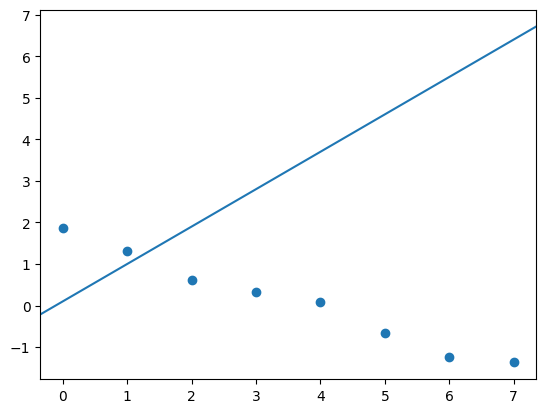

In [10]:
regression_plot(x, y, m, b)

##Machine Learning

**Step 1**: Forward pass

In [11]:
yhat = regression(x, m, b)
yhat

tensor([0.1000, 1.0000, 1.9000, 2.8000, 3.7000, 4.6000, 5.5000, 6.4000],
       grad_fn=<AddBackward0>)

**Step 2**: Compare $\hat{y}$ with true $y$ to calculate cost $C$

There is a PyTorch `MSELoss` method, but let's define it outselves to see how it works. MSE cost is defined by: $$C = \frac{1}{n} \sum_{i=1}^n (\hat{y_i}-y_i)^2 $$

In [39]:
def mse(my_yhat, my_y):
    sigma = torch.sum((my_yhat - my_y)**2)
    return sigma/len(my_y)

In [40]:
C = mse(yhat, y)
C

tensor(19.6755, grad_fn=<DivBackward0>)

**Step 3**: Use autodiff to calculate gradient of $C$ w.r.t. parameters

In [15]:
C.backward()

In [16]:
m.grad

tensor([36.3050])

In [17]:
b.grad

tensor([6.2650])

**Step 4**: Gradient descent

In [41]:
optimizer = torch.optim.SGD([m, b], lr=0.01)

/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:21: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from .autonotebook import tqdm as notebook_tqdm


In [42]:
optimizer.step()

Confirm parameters have been adjusted sensibly:

In [43]:
m

tensor([0.5369], requires_grad=True)

In [44]:
b

tensor([0.0374], requires_grad=True)

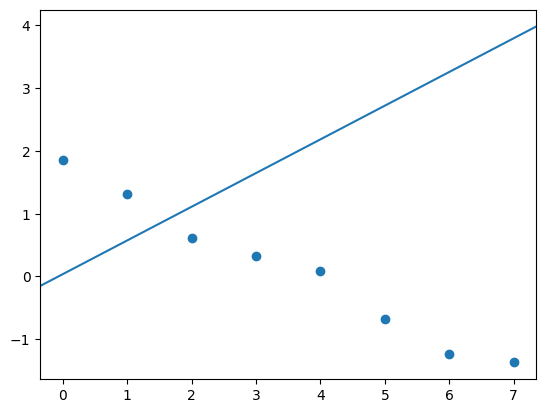

In [45]:
regression_plot(x, y, m, b)


We can repeat steps 1 and 2 to confirm cost has decreased:

In [46]:
C = mse(regression(x, m, b), y)
C

tensor(8.5722, grad_fn=<DivBackward0>)

Put the **4 steps** in a loop to iteratively minimize cost toward zero:

In [51]:
epochs = 1000
for epoch in range(epochs):

    optimizer.zero_grad() # Reset gradients to zero; else they accumulate

    yhat = regression(x, m, b) # Step 1
    C = mse(yhat, y) # Step 2

    C.backward() # Step 3
    optimizer.step() # Step 4

    print('Epoch {}, cost {}, m grad {}, b grad {}'.format(epoch, '%.3g' % C.item(), '%.3g' % m.grad.item(), '%.3g' % b.grad.item()))

Epoch 0, cost 0.0195, m grad 0.000668, b grad -0.00329
Epoch 1, cost 0.0195, m grad 0.000665, b grad -0.00327
Epoch 2, cost 0.0195, m grad 0.000661, b grad -0.00325
Epoch 3, cost 0.0195, m grad 0.000658, b grad -0.00323
Epoch 4, cost 0.0195, m grad 0.000653, b grad -0.00321
Epoch 5, cost 0.0195, m grad 0.00065, b grad -0.00319
Epoch 6, cost 0.0195, m grad 0.000646, b grad -0.00318
Epoch 7, cost 0.0195, m grad 0.000642, b grad -0.00316
Epoch 8, cost 0.0195, m grad 0.000639, b grad -0.00314
Epoch 9, cost 0.0195, m grad 0.000635, b grad -0.00312
Epoch 10, cost 0.0195, m grad 0.000631, b grad -0.0031
Epoch 11, cost 0.0195, m grad 0.000628, b grad -0.00309
Epoch 12, cost 0.0195, m grad 0.000623, b grad -0.00307
Epoch 13, cost 0.0195, m grad 0.00062, b grad -0.00305
Epoch 14, cost 0.0195, m grad 0.000616, b grad -0.00303
Epoch 15, cost 0.0195, m grad 0.000612, b grad -0.00302
Epoch 16, cost 0.0195, m grad 0.00061, b grad -0.003
Epoch 17, cost 0.0195, m grad 0.000605, b grad -0.00298
Epoch 18

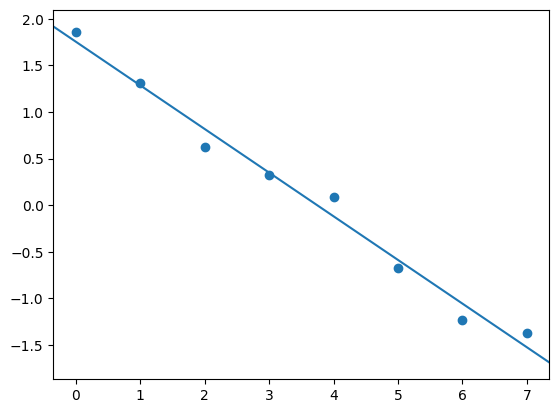

In [48]:
regression_plot(x, y, m, b)

In [49]:
m.item()

-0.4681258499622345

In [50]:
b.item()

1.7542961835861206

**N.B.**: The model doesn't perfectly approximate the slope (-0.5) and $y$-intercept (2.0) used to simulate the outcomes $y$ at the top of this notebook. This reflects the imperfectness of the sample of eight data points due to adding random noise during the simulation step. In the real world, the best solution would be to sample additional data points: The more data we sample, the more accurate our estimates of the true underlying parameters will be.